In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [3]:
!pip install kaggle

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
!pwd



/content/gdrive/My Drive


In [6]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
os.environ

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '19', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'NO_GCE_CHECK': 'True', 'GLIBCXX_FORCE_NEW':

In [0]:
!kaggle datasets list -s stock

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                         492MB  2017-11-16 14:53:29          49491  
dgawlik/nyse                                              New York Stock Exchange                            31MB  2017-02-22 10:18:25          37567  
camnugent/sandp500                                        S&P 500 stock data                                 19MB  2018-02-10 03:15:53          24657  
aaron7sun/stocknews                                       Daily News for Stock Market Prediction              6MB  2019-11-13 18:22:52          28254  
rpaguirre/tesla-stock-price                               Tesla Stock Price             

In [0]:
!mkdir STOCKS

mkdir: cannot create directory ‘STOCKS’: File exists


In [10]:
cd STOCKS

/content/gdrive/My Drive/STOCKS


In [0]:
!mkdir data

In [11]:
cd data

/content/gdrive/My Drive/STOCKS/data


In [0]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

100% 491M/492M [00:07<00:00, 68.1MB/s]
100% 492M/492M [00:07<00:00, 69.6MB/s]


In [0]:
!ls

Data  ETFs  price-volume-data-for-all-us-stocks-etfs.zip  Stocks


In [0]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Archive:  price-volume-data-for-all-us-stocks-etfs.zip
replace Data/ETFs/aadr.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Data/ETFs/aaxj.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!pwd


/content/gdrive/My Drive/STOCKS


In [12]:
cd Stocks

/content/gdrive/My Drive/STOCKS/data/Stocks


In [0]:


#print ("shape of the dataset:", tss.shape)

/content/gdrive/My Drive/STOCKS/data


In [13]:
 
allfiles = np.sort(np.array(glob.glob("*.txt")))[:10]
tss = pd.read_csv(allfiles[0])[["Date", 
                                "Close"]].rename({
  "Close":allfiles[0].replace(".txt","")}, axis=1)
for f in allfiles[1:]:
    print(f)
    name = f.replace(".txt","")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename(
      {"Close":name}, axis=1), on="Date")
tss.set_index("Date", inplace=True)


aa.us.txt
aaap.us.txt
aaba.us.txt
aac.us.txt
aal.us.txt
aamc.us.txt
aame.us.txt
aan.us.txt
aaoi.us.txt


In [15]:
print(tss)


              a.us   aa.us  aaap.us  aaba.us  ...  aamc.us  aame.us  aan.us  aaoi.us
Date                                          ...                                   
2015-11-11  36.901  17.779    24.50    33.38  ...    20.75   4.7960  24.649    16.76
2015-11-12  36.734  17.206    25.00    33.23  ...    19.17   4.8951  24.182    16.11
2015-11-13  36.030  17.581    25.26    32.19  ...    17.50   4.6672  23.795    16.60
2015-11-16  36.577  18.242    25.02    32.94  ...    15.58   4.8455  23.923    16.93
2015-11-17  37.607  18.197    24.62    32.86  ...    12.59   4.9150  23.418    16.68
...            ...     ...      ...      ...  ...      ...      ...     ...      ...
2017-11-02  68.130  47.460    81.00    70.51  ...    88.00   3.6500  35.800    39.28
2017-11-03  68.370  47.120    80.99    70.23  ...    80.40   3.6000  36.430    37.82
2017-11-07  68.250  46.970    81.00    72.22  ...    81.00   3.4000  34.440    37.89
2017-11-09  67.470  43.330    81.00    70.19  ...    84.05   3.50

In [16]:
tss.shape


(447, 10)

In [0]:
a = pd.Series(tss['a.us'])

In [0]:
a.head

<bound method NDFrame.head of Date
2015-11-11    36.901
2015-11-12    36.734
2015-11-13    36.030
2015-11-16    36.577
2015-11-17    37.607
               ...  
2017-11-02    68.130
2017-11-03    68.370
2017-11-07    68.250
2017-11-09    67.470
2017-11-10    66.810
Name: a.us, Length: 447, dtype: float64>

In [17]:
print(tss.columns)

Index(['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us', 'aal.us', 'aamc.us',
       'aame.us', 'aan.us', 'aaoi.us'],
      dtype='object')


#  data inspection

plot each time series (ts)

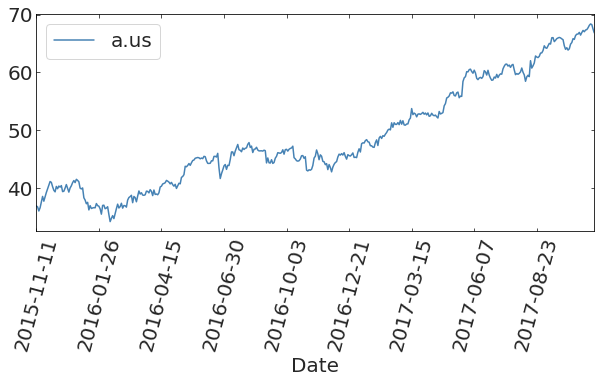

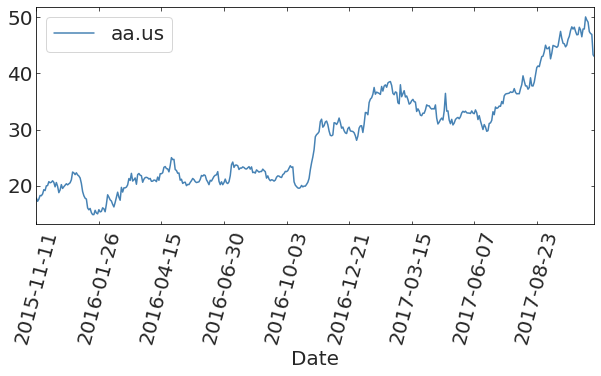

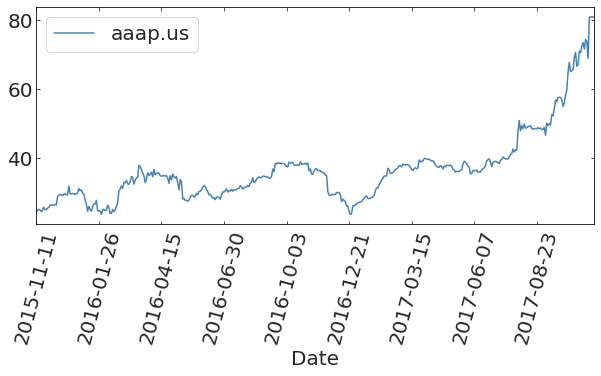

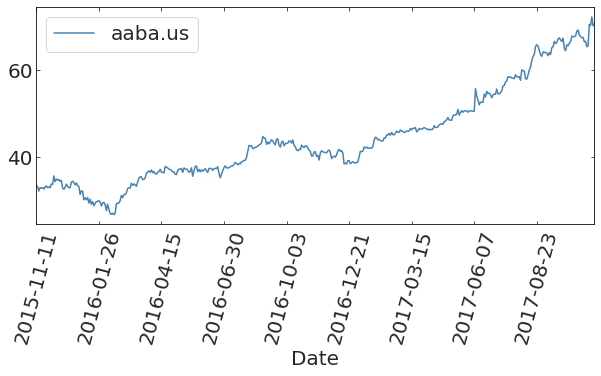

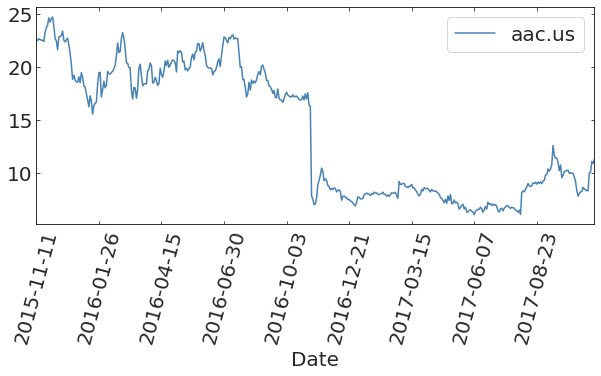

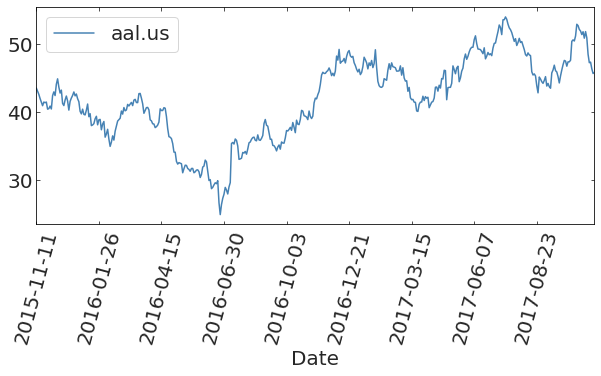

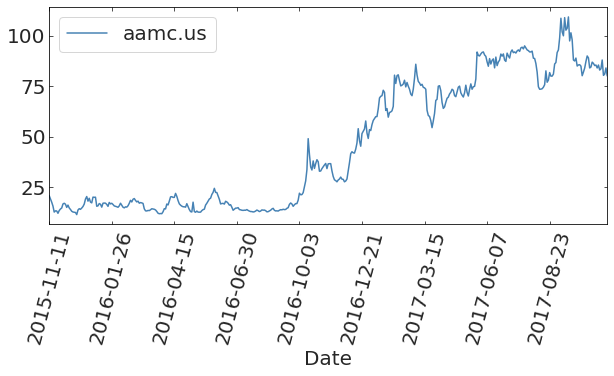

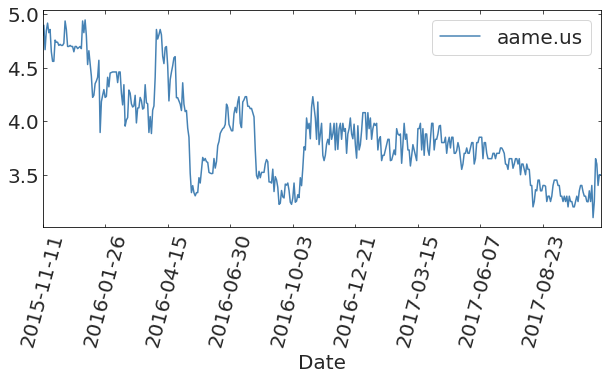

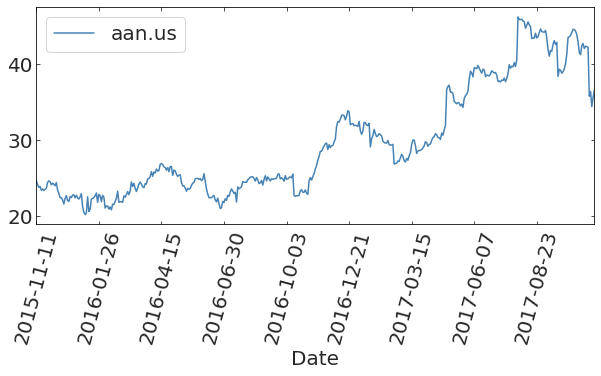

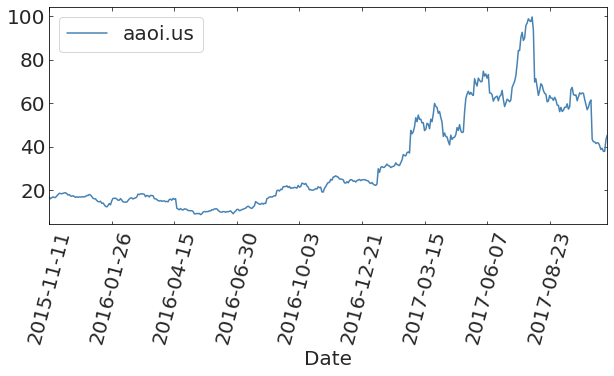

In [48]:
for c in tss.columns:
      fig, ax = pl.subplots(figsize=(10,4))
      tss.plot(y=c, ax=ax, rot=75)




## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


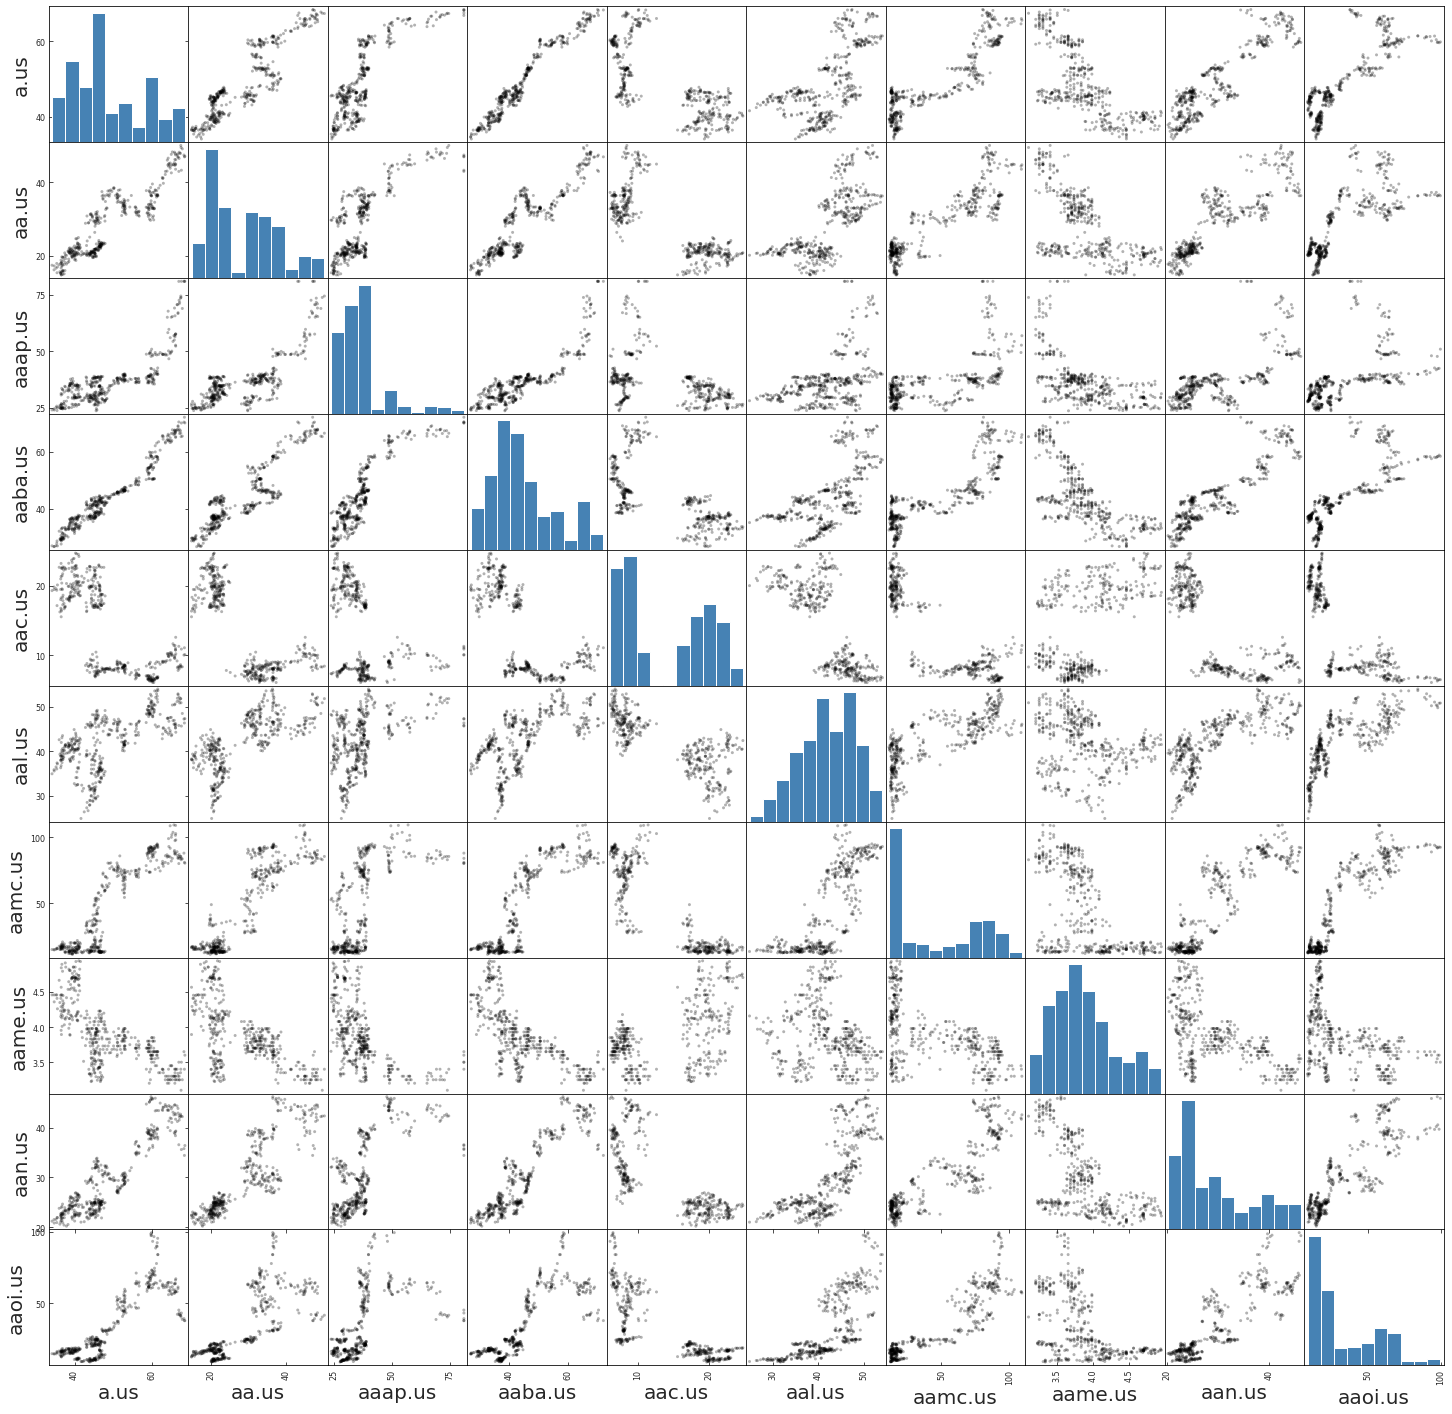

In [0]:
from pandas.plotting import scatter_matrix
#from IPython.display import clear_output
#clear_output()
scatter_matrix(tss, alpha=0.3, figsize=(25, 25), diagonal='hist', c='black')
tss.corr()


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


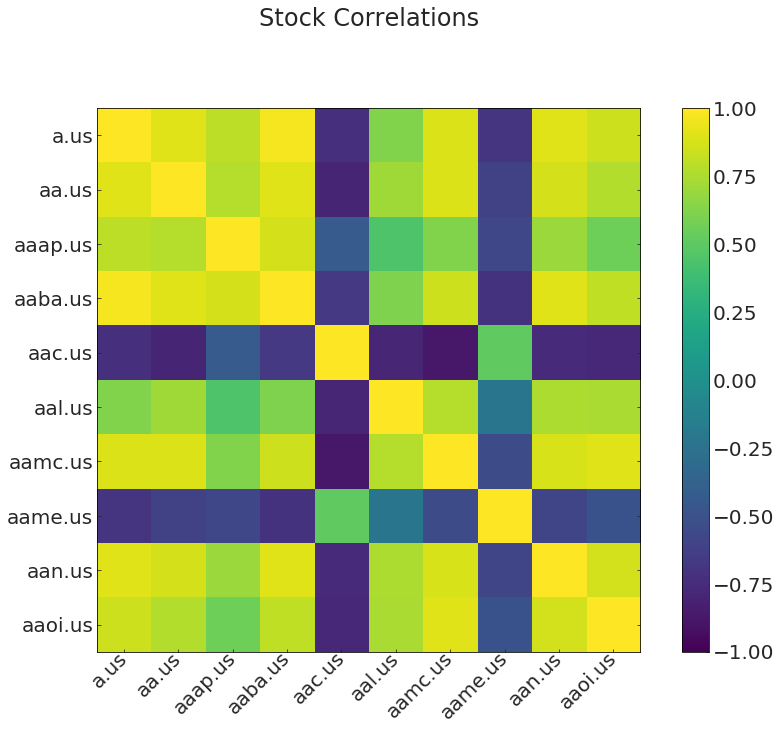

In [19]:
#Heatmap:
fig = plt.figure()
#ax = fig.add_subplot(111)

ax = plt.gca()
my_plot = ax.matshow(tss.corr(), vmin=-1, vmax=1)
fig.colorbar(my_plot)

ax.set_xticks(np.arange(len(tss.columns)))
ax.set_xticklabels(tss.columns)
ax.set_yticks(np.arange(len(tss.columns)))
ax.set_yticklabels(tss.columns)

# Set ticks on bottom side of axes on
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
# Rotate and align bottom ticklabels
plt.setp([tick.label1 for tick in ax.xaxis.get_major_ticks()], rotation=45,
         ha="right", va="center", rotation_mode="anchor")

ax.set_title("Stock Correlations", pad=55)

plt.show()


## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [0]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as ts

In [21]:
threshold = 0.05
for c in tss.columns[:10]:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)
print("...")

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False
...


In [0]:
sm.tsa.stattools.adfuller(tss['a.us'])[1] < threshold

False

## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

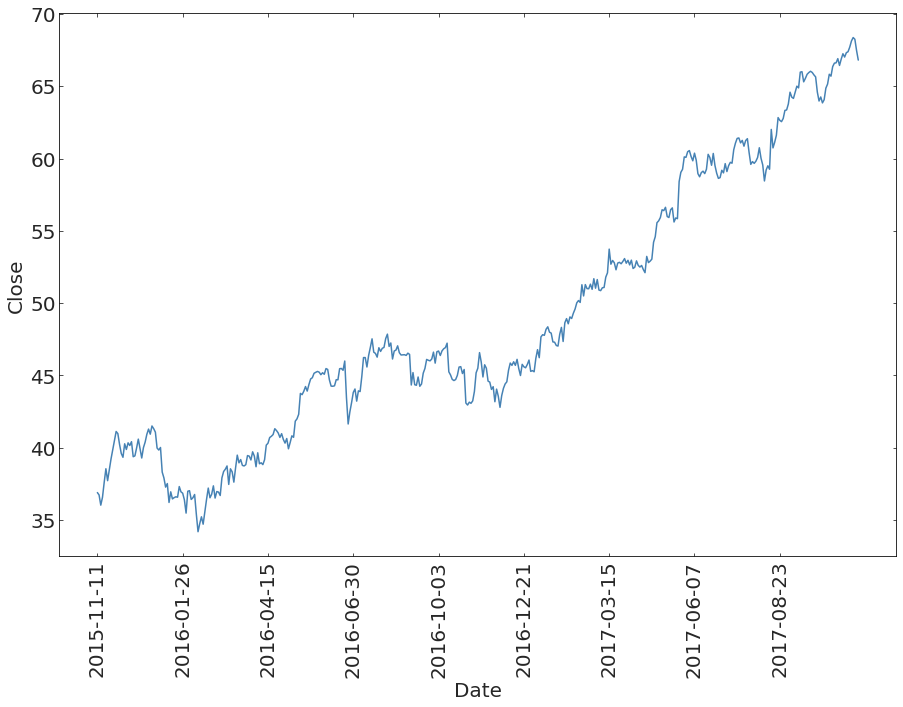

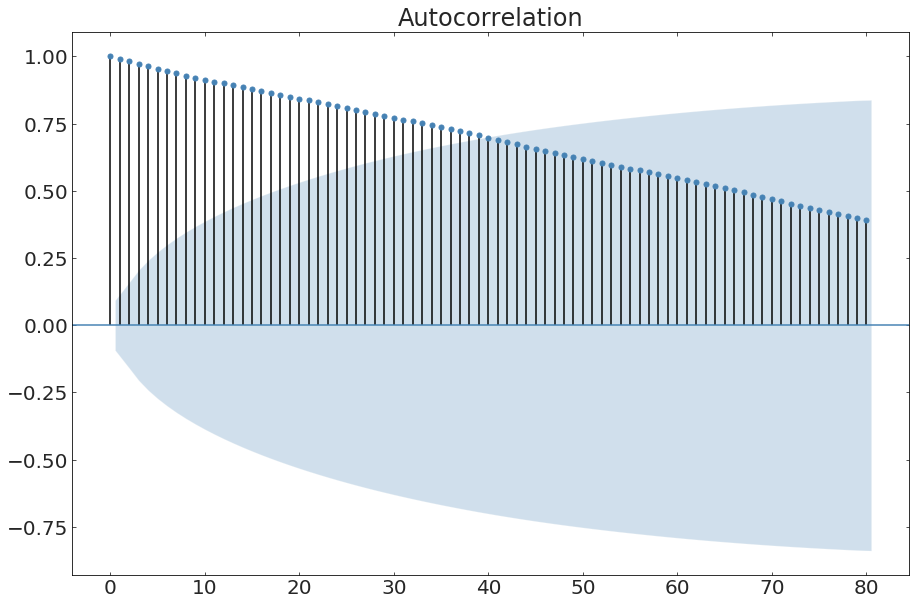

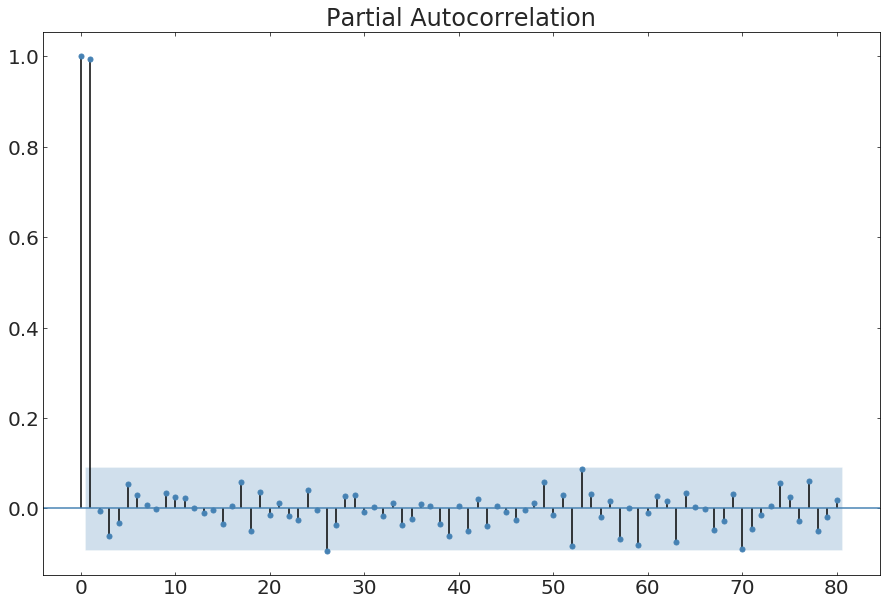

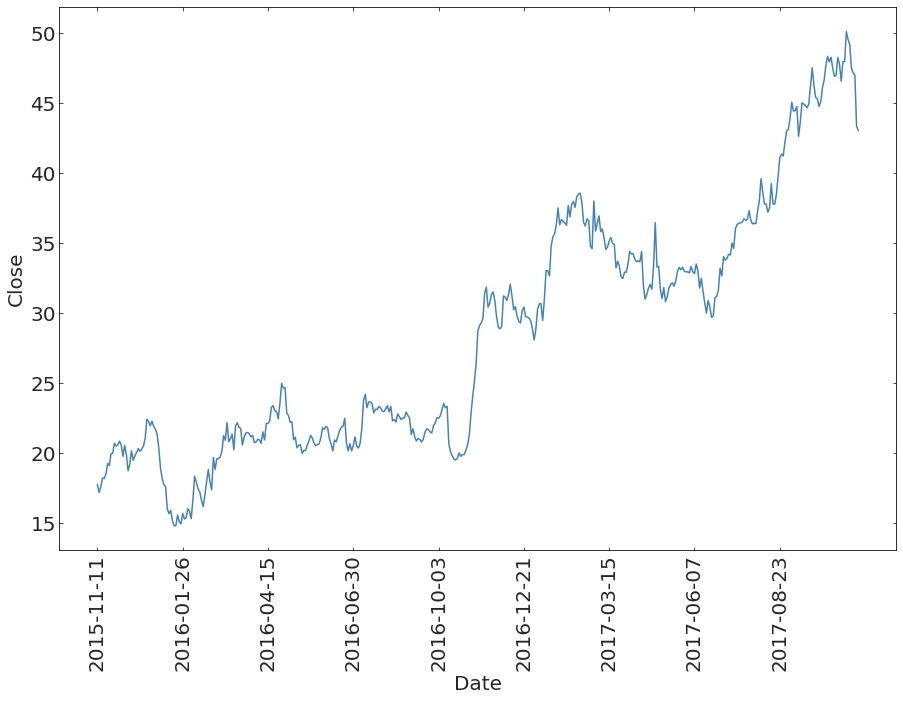

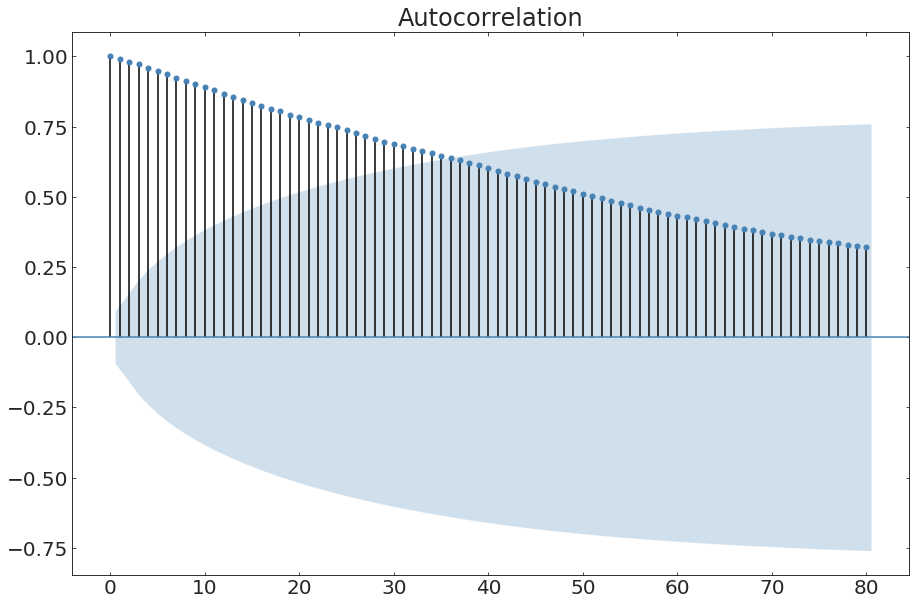

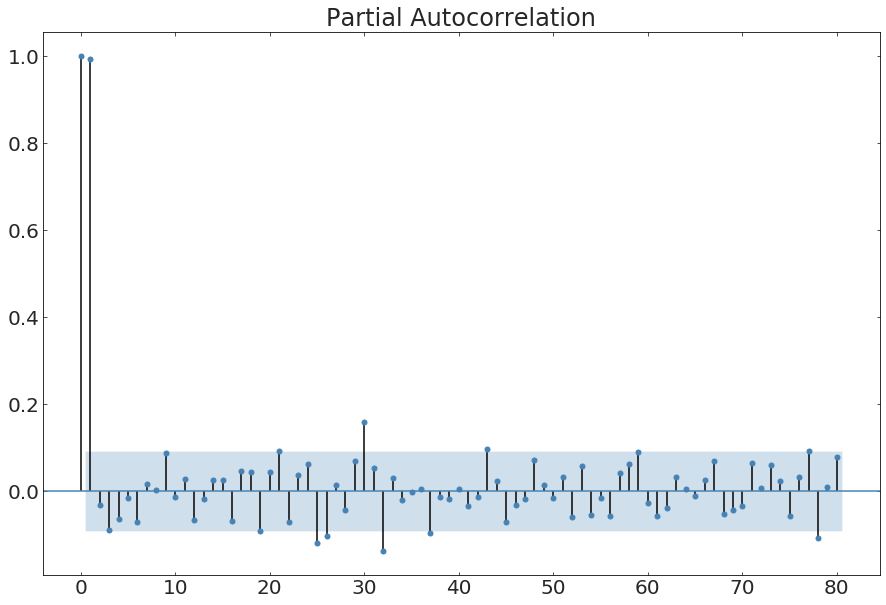

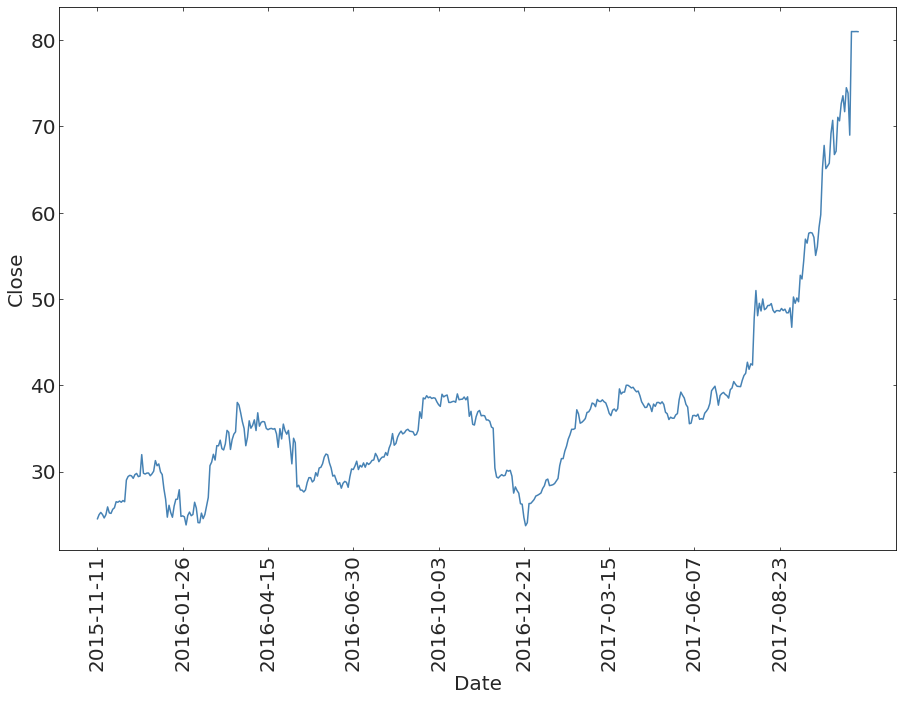

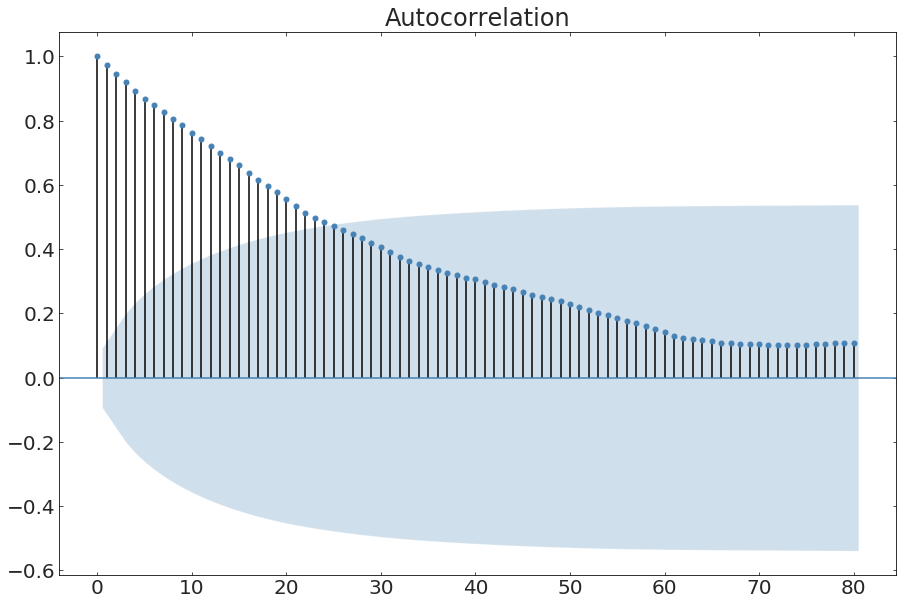

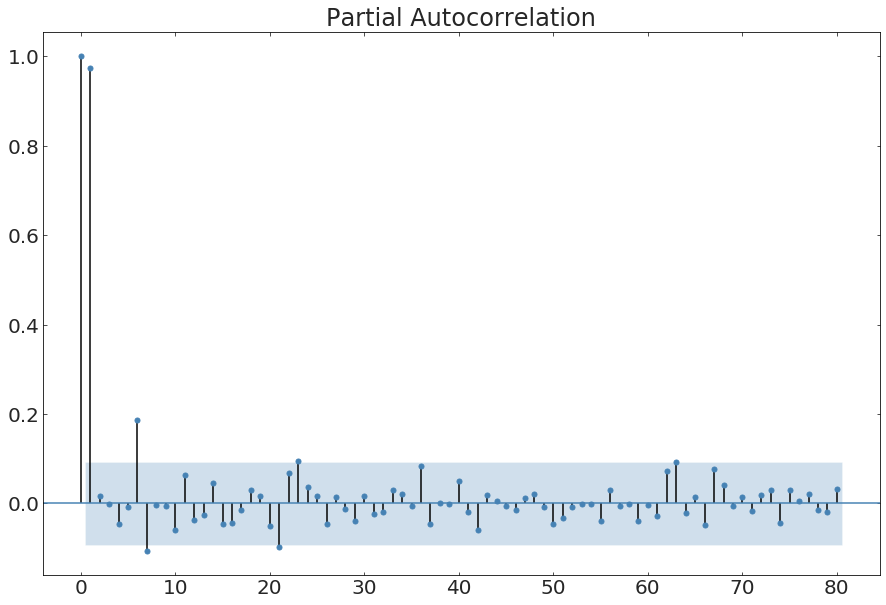

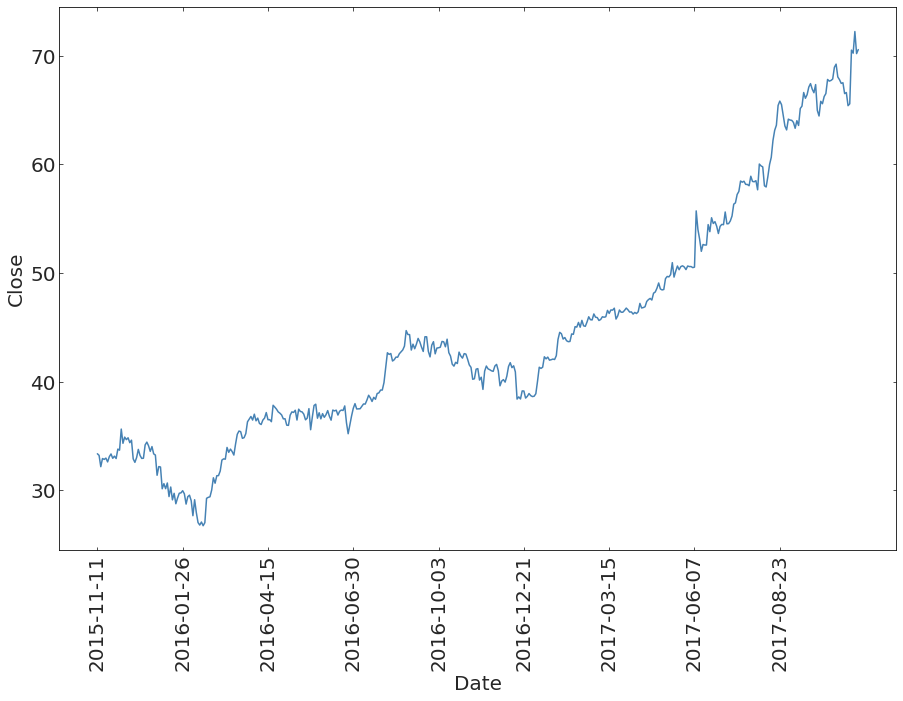

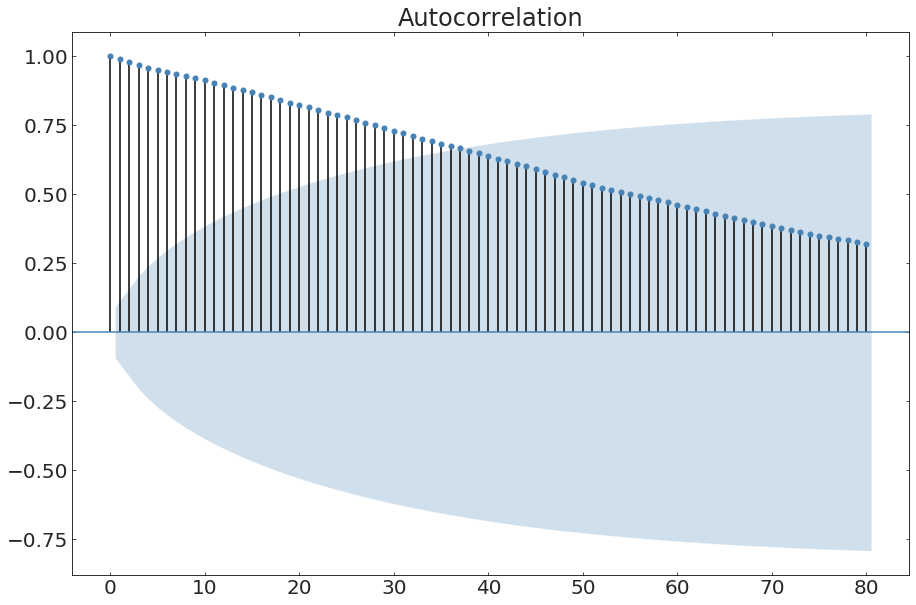

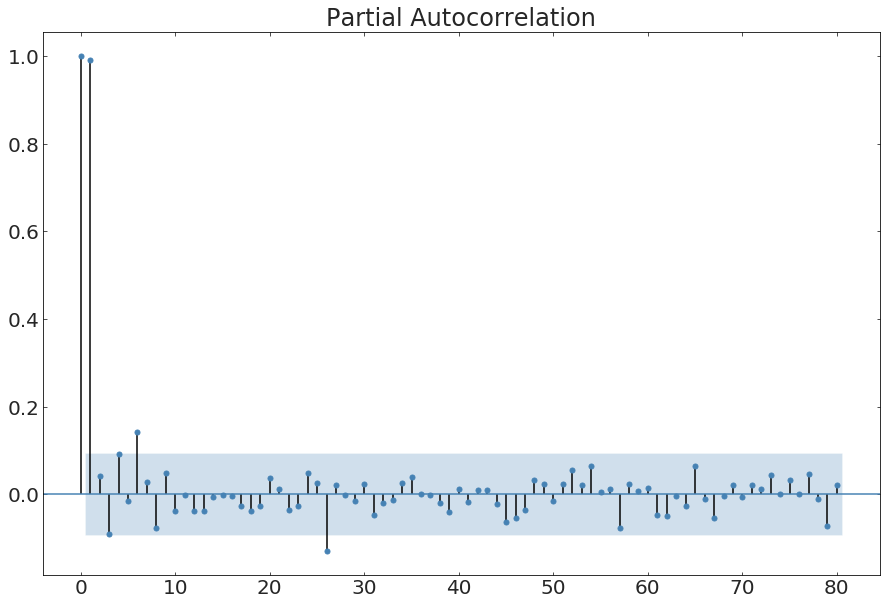

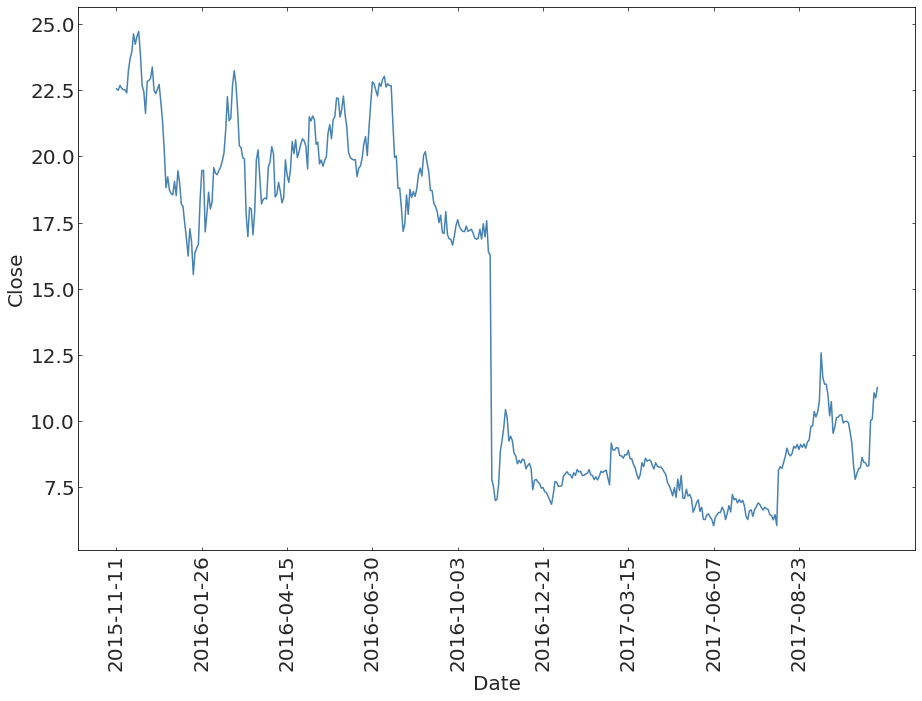

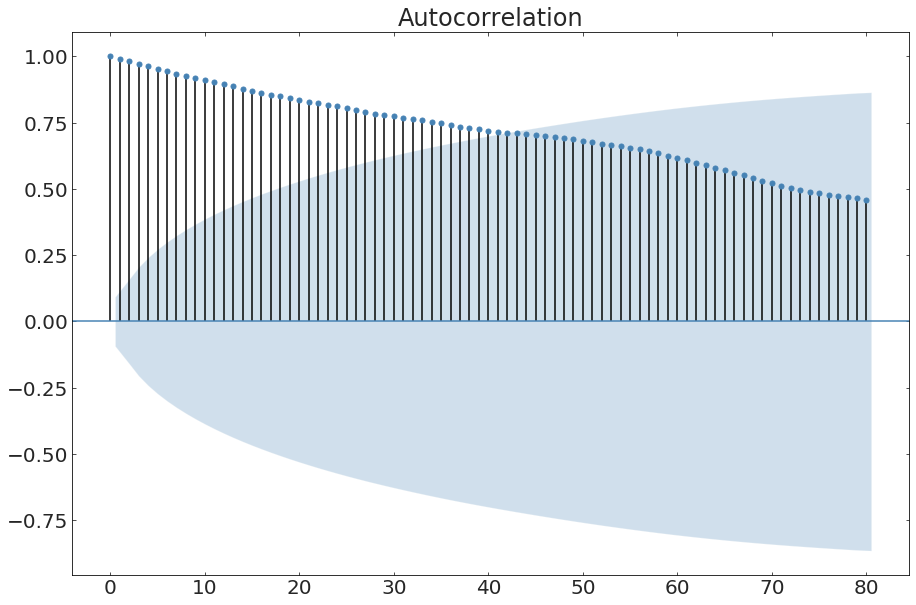

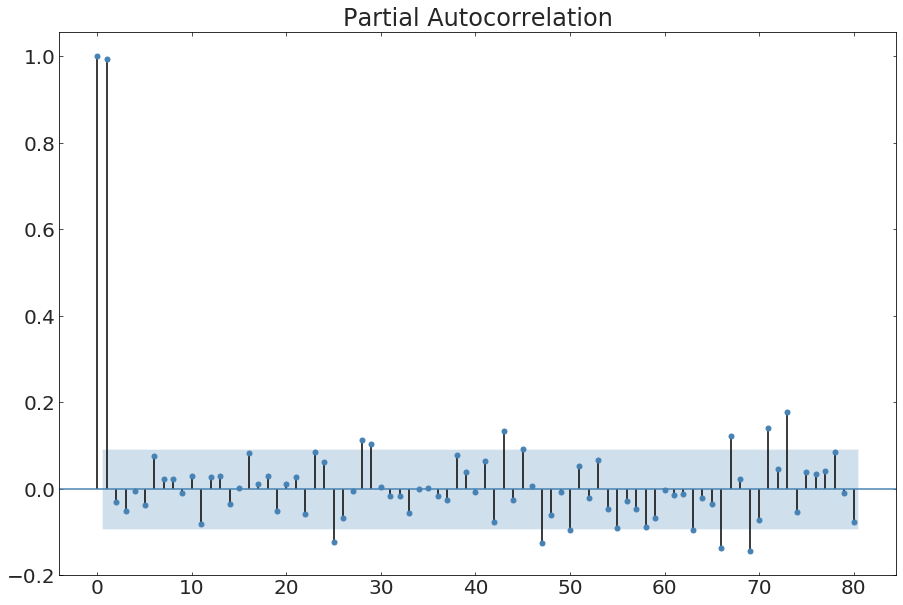

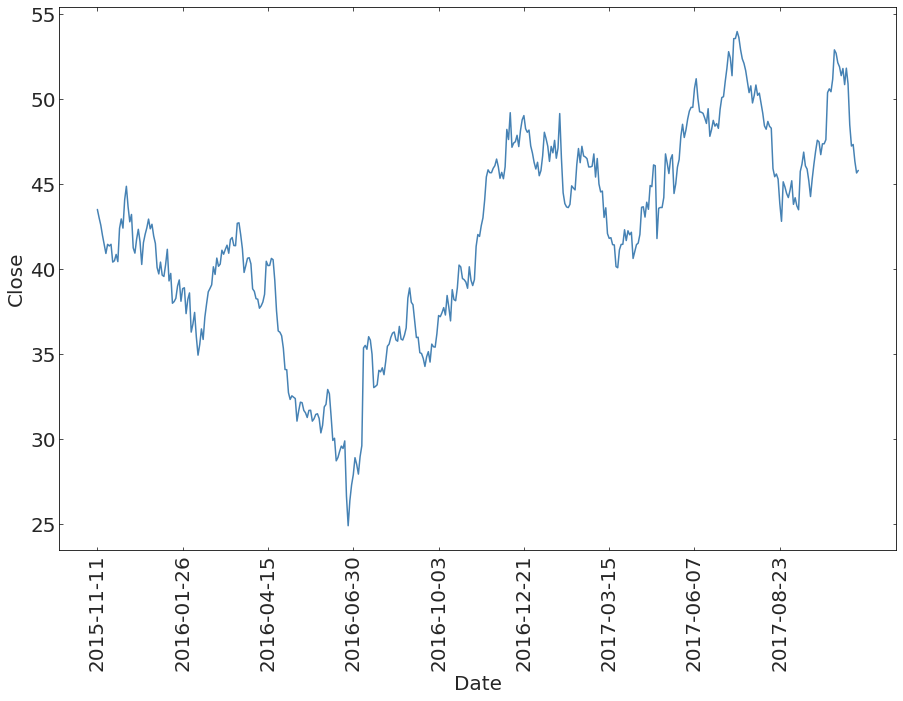

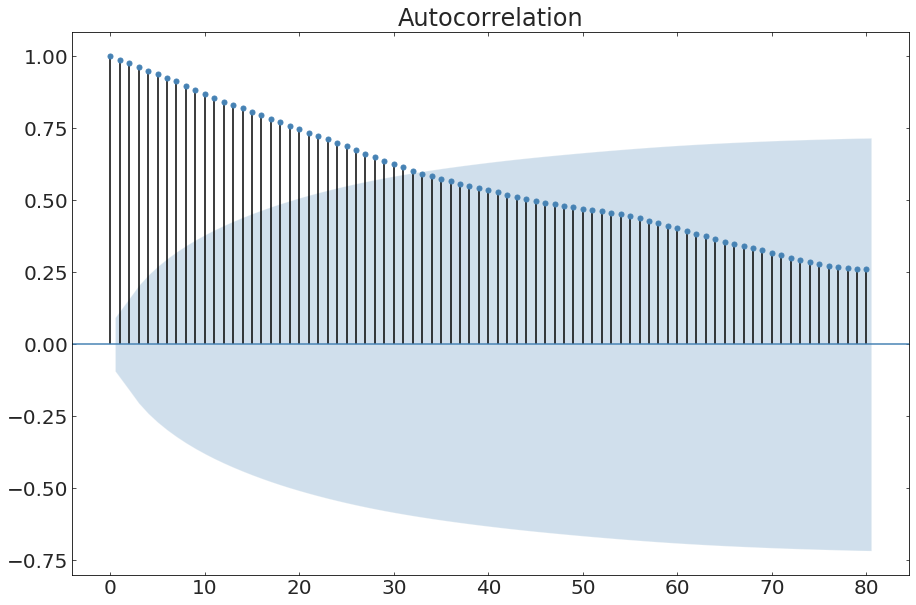

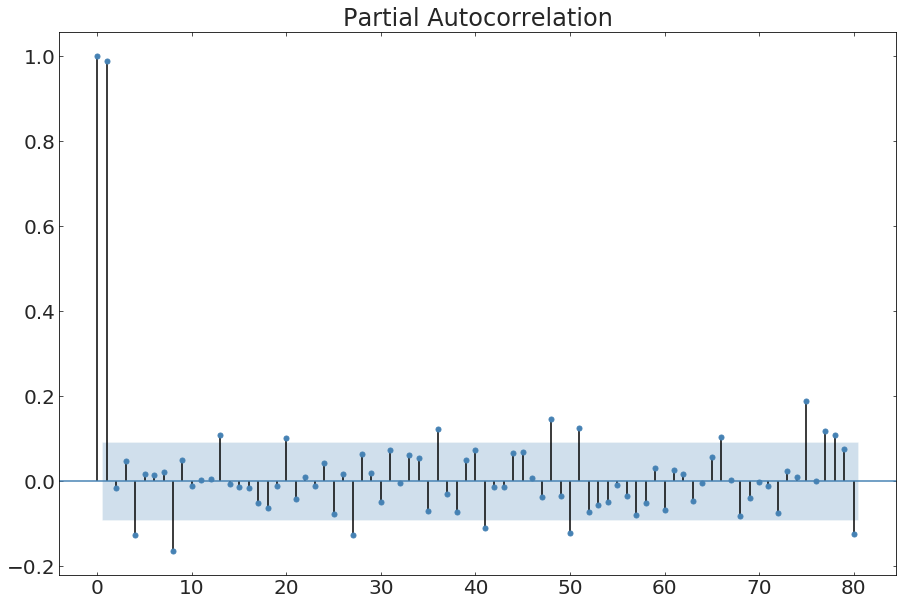

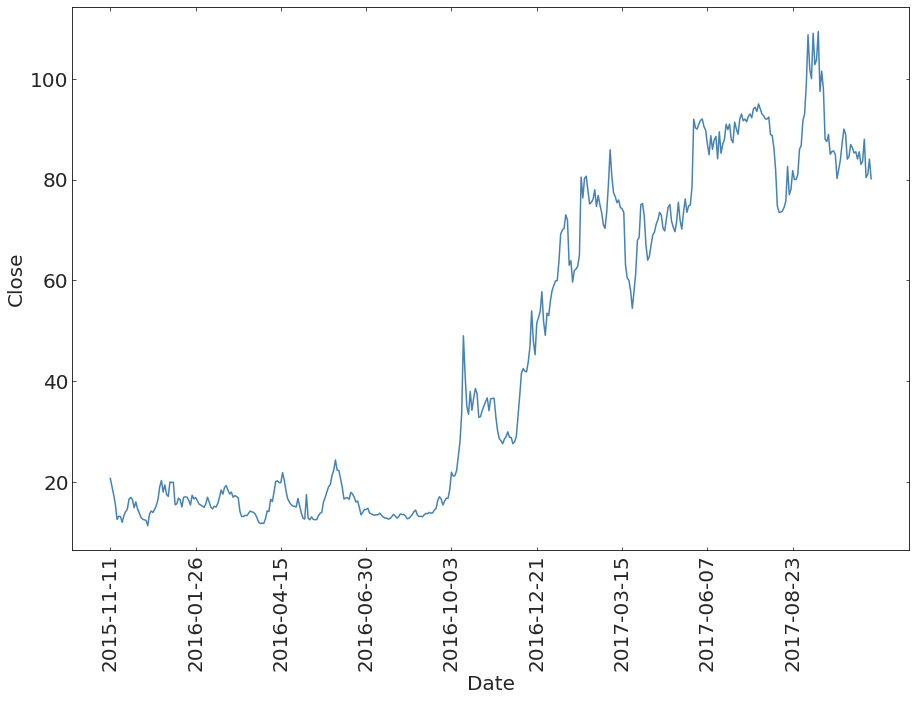

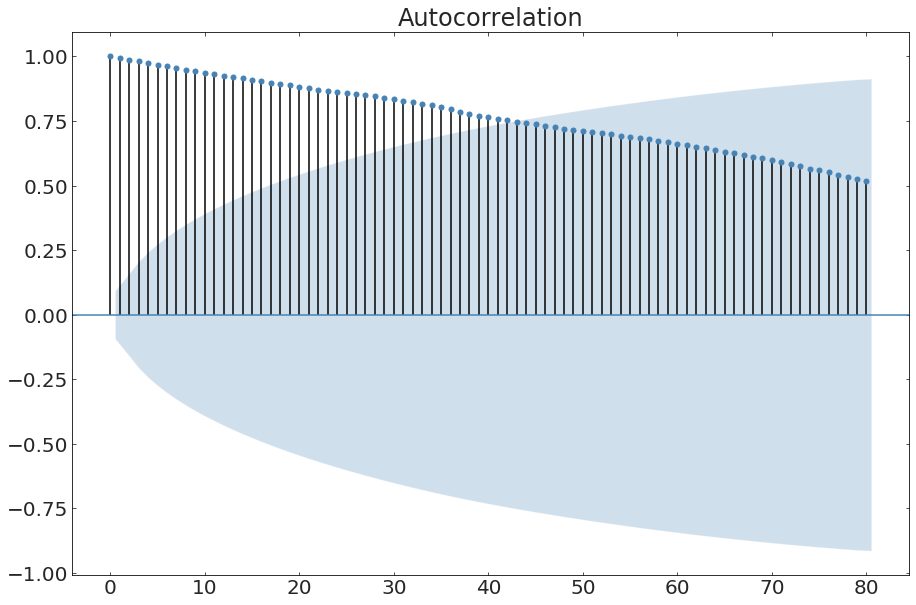

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


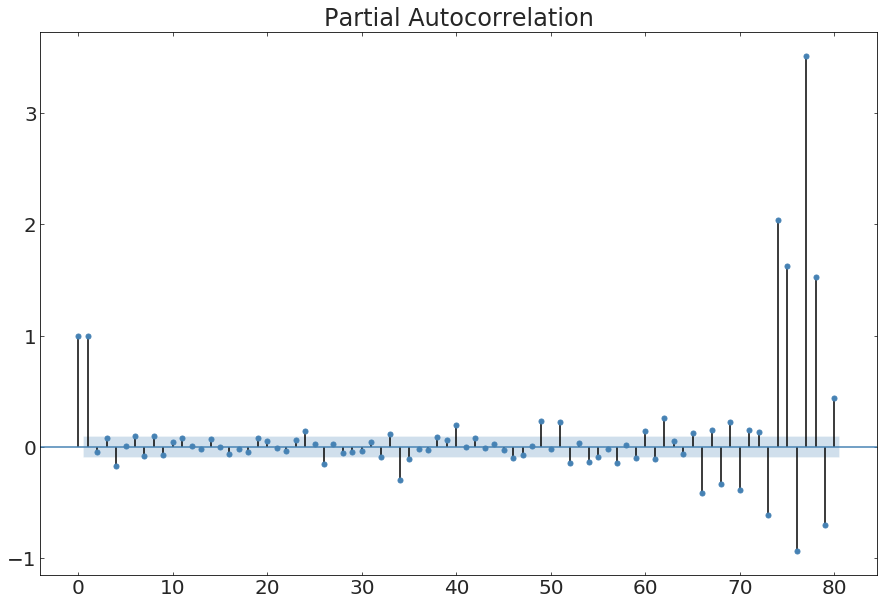

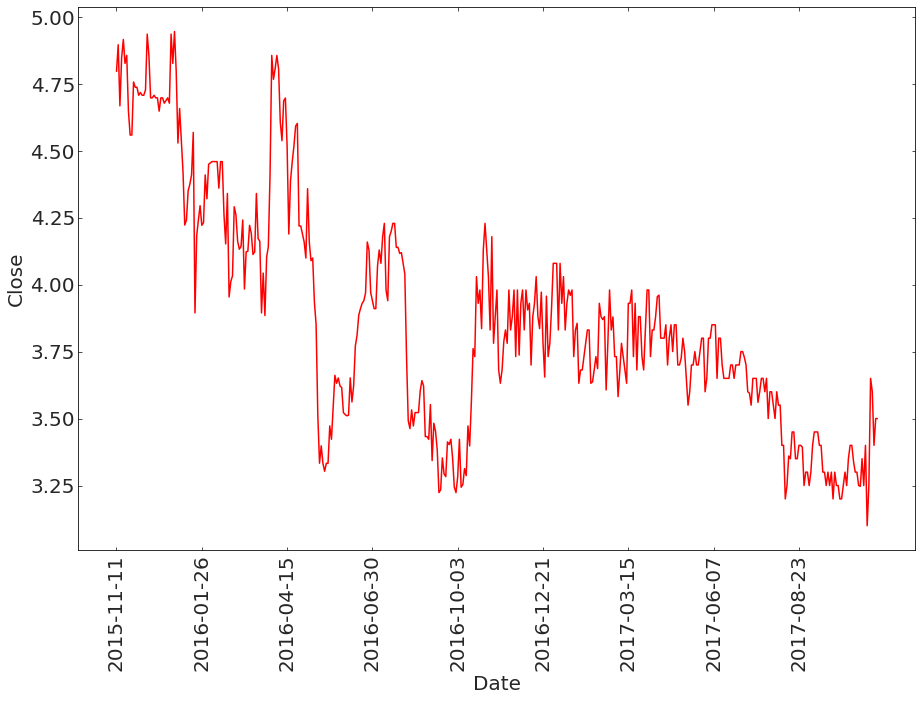

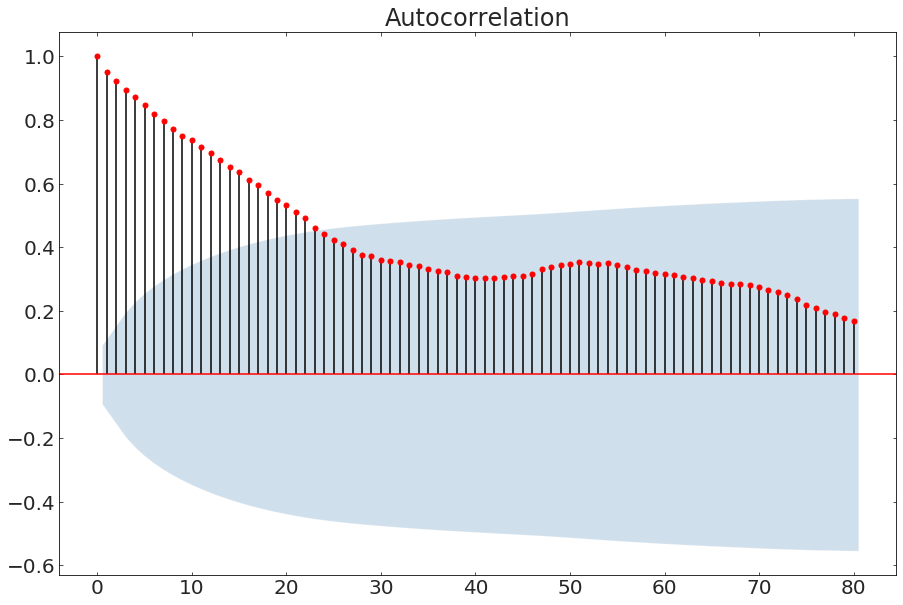

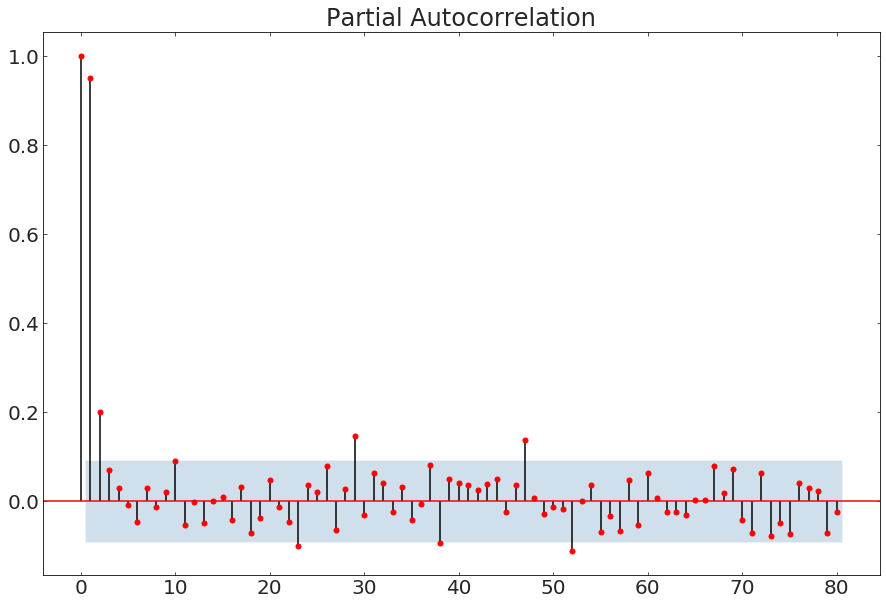

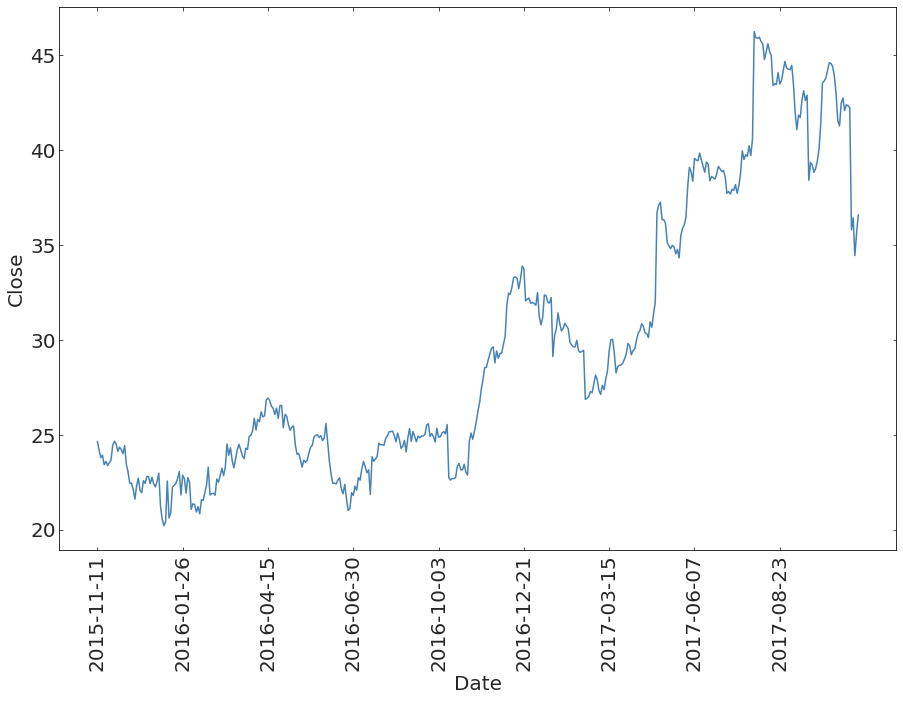

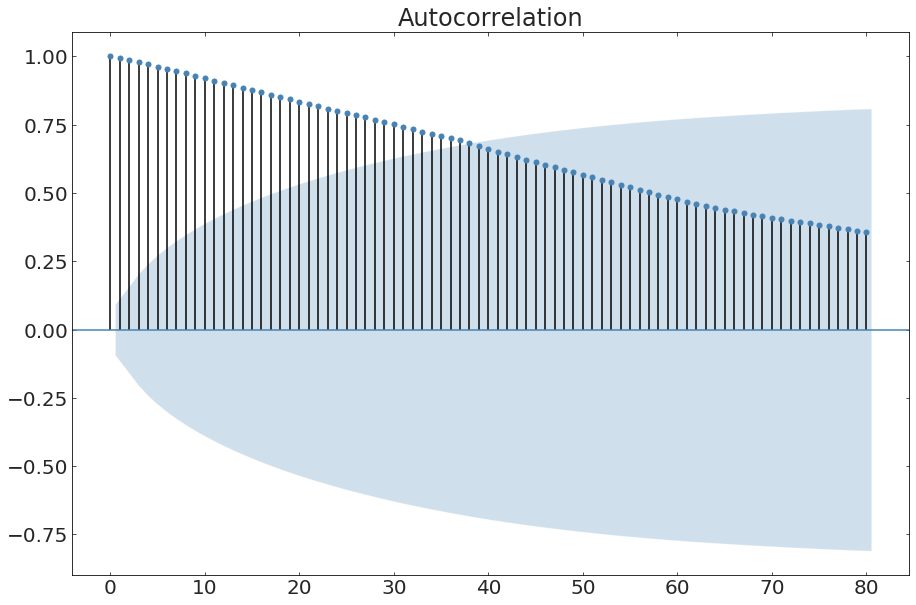

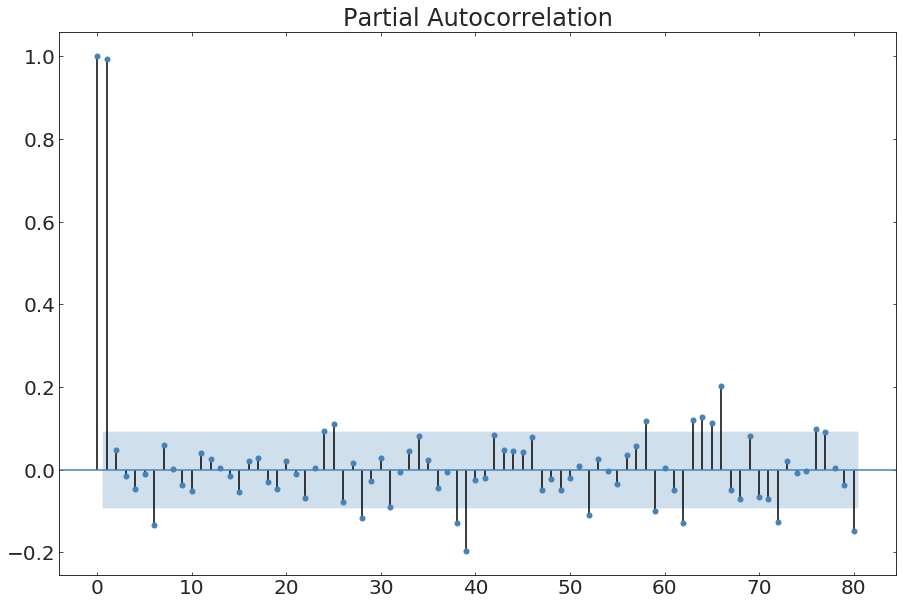

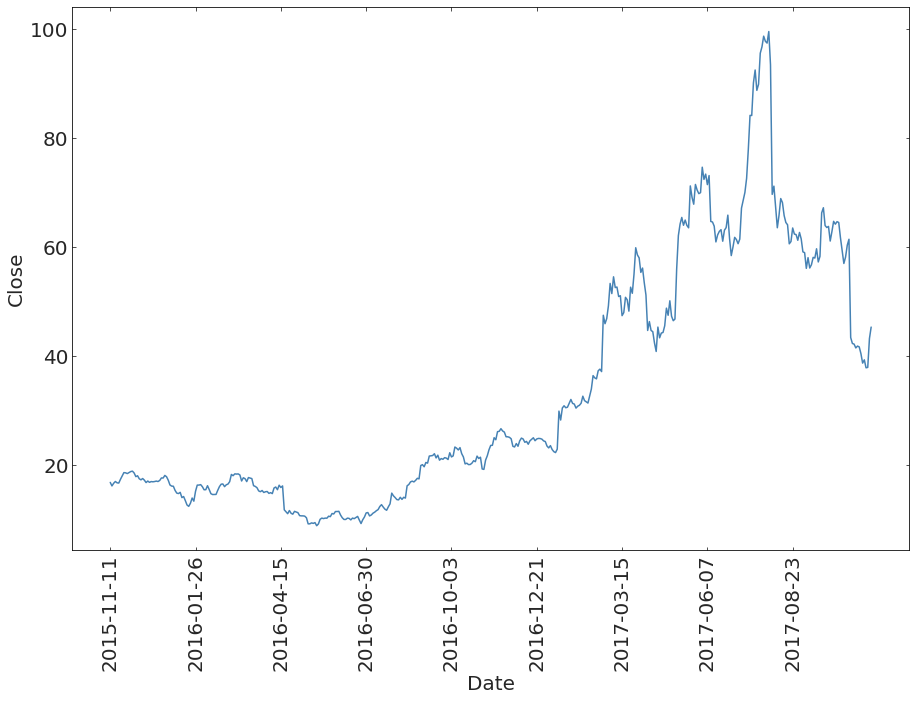

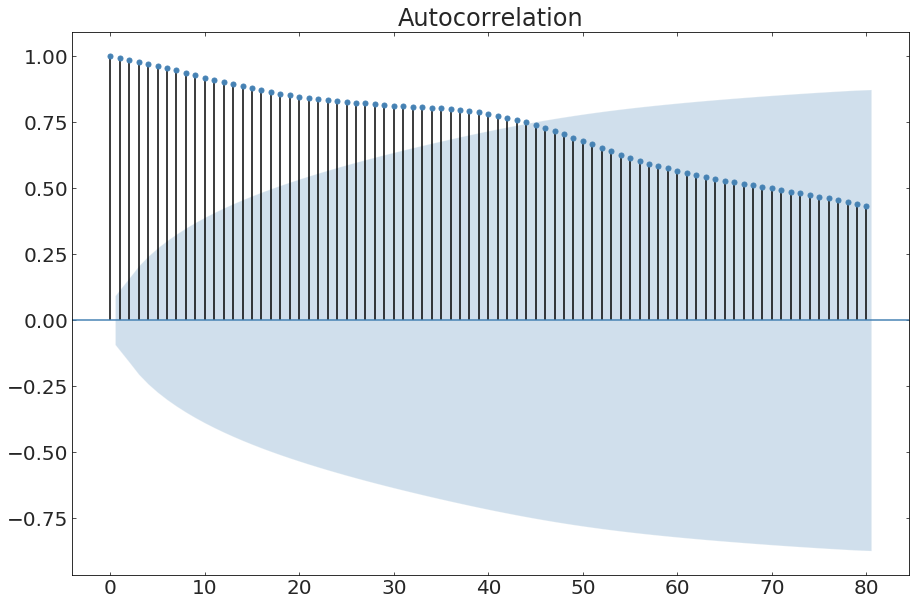

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


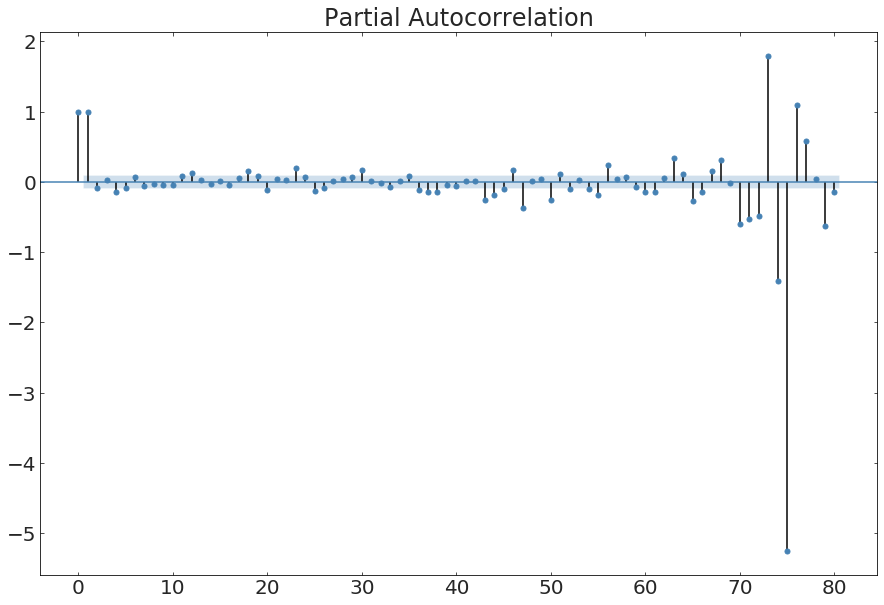

In [22]:
for c in tss.columns [:10]:
  if sm.tsa.stattools.adfuller(tss[c])[1] < threshold:
    c = pd.Series(tss[c])
    plt.plot(c,color = 'red')
    plt.ylabel("Close", fontsize=20)
    plt.xlabel("Date", fontsize=20);
    plt.xticks(np.arange(0, len(tss.index), 50), rotation = 'vertical')
    plt.show()
    ts.plot_acf(c, lags = 80, color = 'red')
    plt.show()
    ts.plot_pacf(c, lags = 80, color = 'red')
    plt.show()
  else:
    c = pd.Series(tss[c])
    plt.plot(c)
    plt.ylabel("Close", fontsize=20)
    plt.xlabel("Date", fontsize=20);
    plt.xticks(np.arange(0, len(tss.index), 50), rotation = 'vertical')
    plt.show()
    ts.plot_acf(c, lags = 80)
    plt.show()
    ts.plot_pacf(c, lags = 80)
    plt.show()



#for c in tss.columns:
 # c = pd.Series(tss[c])
  #plt.plot(c)
  #plt.ylabel("Close", fontsize=20)
  #plt.xlabel("Date", fontsize=20);
  #plt.xticks(np.arange(0, len(tss.index), 50), rotation = 'vertical')
  #plt.show()
  #ts.plot_acf(c, lags = 80)
  #plt.show()
  #ts.plot_pacf(c, lags = 80)
  #plt.show()

#plot.acorr(c, maxlags=100) statsmodels.graphics.tsaplots
#for c in tss.columns:
 # c = pd.Series(tss[c])
  #figsize(15,10)
  #plt.plot(c)
  #plt.ylabel("Close", fontsize=20)
  #plt.xlabel("Date", fontsize=20);
  #plt.legend(tss.columns)
  #plt.xticks(np.arange(0, len(tss.index), 50), rotation = 'vertical')
  #plt.show()
 

# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [23]:
#example of model output
mod = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit()


#test = (tss[c], (3,1), dates=tss["Date"], ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
mod.summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 27 Feb 2020   AIC                           -594.115
Time:                        03:27:42   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

In [49]:
aics_st = np.zeros((5,5))
aics_st[:] = np.nan

for p in range(5):
    for q in range(5):
        try :
            mod = sm.tsa.ARMA(tss[['aame.us']], (p,q)).fit()
            print(mod.aic)
            aics_st[p,q] = mod.aic

        except :
            pass
print("best parameters: ", np.where(aics_st == np.nanmin(aics_st)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

522.0196275870962
106.23491009614554
-130.21340756720542
-245.70555256615467
-323.71484051098173
-568.1307057346728


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-594.1149218798437
-592.2582741547974


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-590.4374948591164


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-588.5536108645749
-591.4727386903519


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-592.2792517067387


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-590.1748845133147


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-588.4783451985861
-591.5466830206851


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-590.3828867548807


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-588.4252971636943


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-593.8307998561875
-590.4940463691241


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-588.5159731320841


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-586.5583548840095


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-591.4667760551715


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-589.7305869980894
best parameters:  (array([1]), array([1]))


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## 4. predict the in-set and the future alues

you can use ```mod.plot_predict()``` to visualize them

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


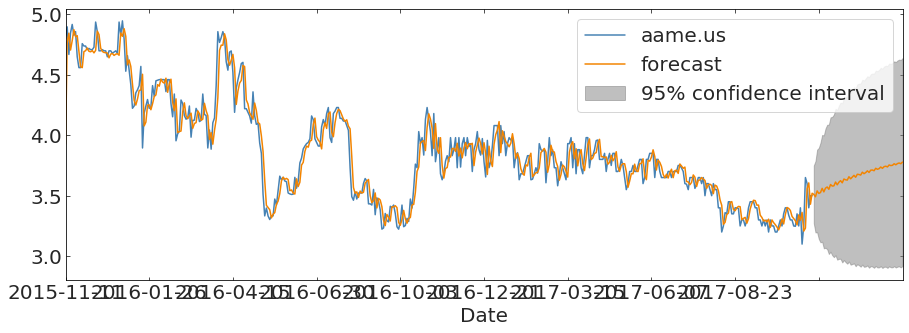

In [25]:
ax = tss[['aame.us']].plot(figsize=(15,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

# 3.5 what are the coefficients of the best fit model? what do they mean? 


constant : 3.9275 S.E =  0.0204 

ar.L1.aame.us 0.9811 S.E = 0.010

ma.L1.aame.us -0.2706 S.E = 0.049

the value of AIC is -594.115 - the smaller the value the better the model fit. 

#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

# **Non-Stationary Example 1 using aal.us:**


In [75]:

aics_st2 = np.zeros((5,5))
#aics_st2[:] = np.nan
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(tss[['aal.us']], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

d = 0.1
for p in range(5):
    for q in range(5):
        try :
            model = ARIMA(tss[['aal.us']], order=(p,d,q))
            model_fit = model.fit(disp=0)
            #mod = sm.tsa.ARMA(tss[['aaap.us']], (p, d, q)).fit()
            #print(model_fit.aic)
            aics_st2[p,q] = model_fit.aic
        except :
            pass


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.aal.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -593.550
Method:                       css-mle   S.D. of innovations              0.916
Date:                Thu, 27 Feb 2020   AIC                           1201.100
Time:                        04:44:32   BIC                           1229.802
Sample:                             1   HQIC                          1212.416
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0052      0.044      0.118      0.906      -0.081       0.091
ar.L1.D.aal.us     0.0171      0.047      0.360      0.719      -0.076       0.110
ar.L2.D.aal.us    -0.0497      0.047

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [76]:
print(aics_st2)
print(np.nanmin(aics_st2))
np.where(aics_st2 == np.nanmin(aics_st2))
print("best parameters: ", np.where(aics_st2 == np.nanmin(aics_st2)))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
best parameters:  (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

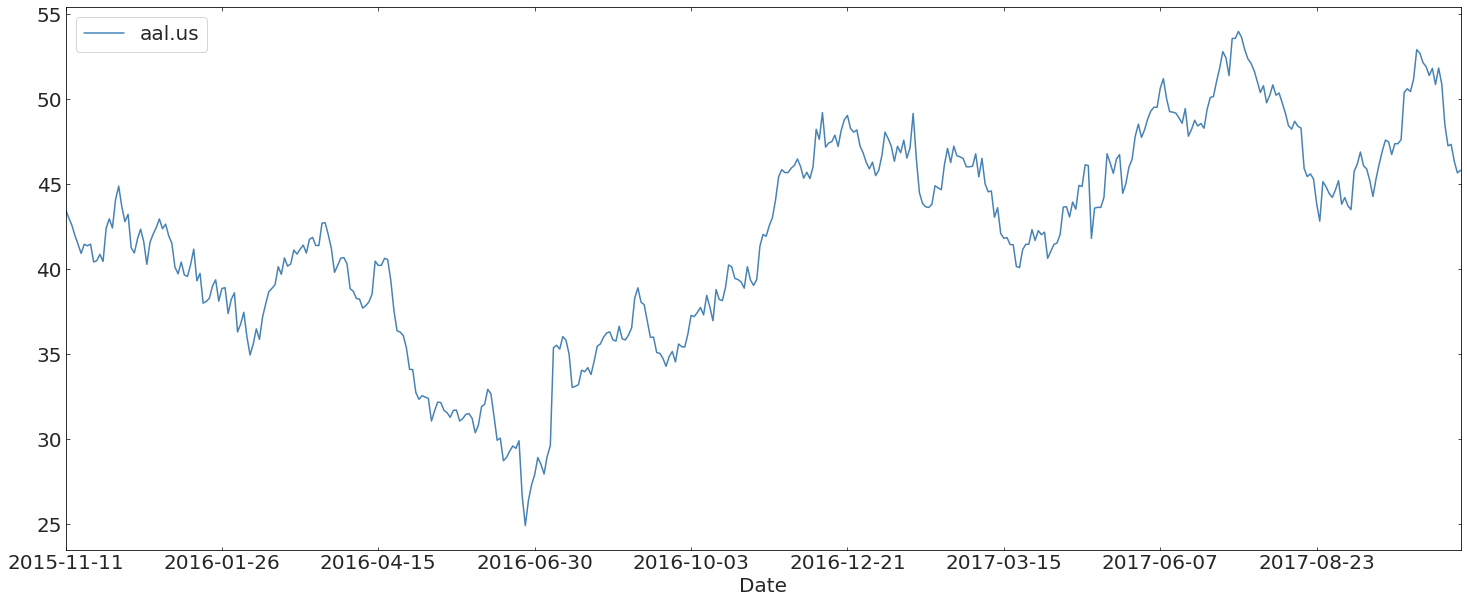

In [77]:
ax = tss[['aal.us']].plot(figsize=(25,10))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

In [78]:
aics_st3 = np.zeros((5,5))

from statsmodels.tsa.arima_model import ARIMA
model3 = ARIMA(tss[['aan.us']], order=(5,1,0))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

d = 1
for p in range(5):
    for q in range(5):
        try :
            #model3_v2 = ARIMA(tss[['aan.us']], order=(p,d,q))
            model3_v2 = ARIMA(tss[['aan.us']], order=(5,1,0))

            model_fit3_v2 = model3_v2.fit(disp=0)
            #mod = sm.tsa.ARMA(tss[['aaap.us']], (p, d, q)).fit()
            #print(model_fit.aic)
            aics_st3[p,q] = model_fit3_v2.aic
        except :
            pass
print("best parameters: ", np.where(aics_st3 == np.nanmin(aics_st3)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.aan.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -529.672
Method:                       css-mle   S.D. of innovations              0.793
Date:                Thu, 27 Feb 2020   AIC                           1073.344
Time:                        04:48:19   BIC                           1102.046
Sample:                             1   HQIC                          1084.660
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0276      0.036      0.773      0.440      -0.042       0.098
ar.L1.D.aan.us    -0.0283      0.047     -0.597      0.551      -0.121       0.065
ar.L2.D.aan.us     0.0326      0.047

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
ax = tss[lcs[1]].plot(figsize=(15,5))
mod = sm.tsa.ARIMA(tss[lcs[1]], (np.where(aics[1] == np.nanmin(aics[1]))[0][0], 2,  
                                 np.where(aics[1] == np.nanmin(aics[1]))[1][0])).fit()    
mod.plot_predict(end=500, plot_insample=False, ax=ax);

NameError: ignored

# **Non-Stationary Example 3**

In [79]:
aics_st3 = np.zeros((5,5))

from statsmodels.tsa.arima_model import ARIMA
model3 = ARIMA(tss[['aan.us']], order=(5,1,0))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

d = 1
for p in range(5):
    for q in range(5):
        try :
            #model3_v2 = ARIMA(tss[['aan.us']], order=(p,d,q))
            model3_v2 = ARIMA(tss[['aan.us']], order=(5,1,0))

            model_fit3_v2 = model3_v2.fit(disp=0)
            #mod = sm.tsa.ARMA(tss[['aaap.us']], (p, d, q)).fit()
            #print(model_fit.aic)
            aics_st3[p,q] = model_fit3_v2.aic
        except :
            pass
print("best parameters: ", np.where(aics_st3 == np.nanmin(aics_st3)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.aan.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -529.672
Method:                       css-mle   S.D. of innovations              0.793
Date:                Thu, 27 Feb 2020   AIC                           1073.344
Time:                        04:49:31   BIC                           1102.046
Sample:                             1   HQIC                          1084.660
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0276      0.036      0.773      0.440      -0.042       0.098
ar.L1.D.aan.us    -0.0283      0.047     -0.597      0.551      -0.121       0.065
ar.L2.D.aan.us     0.0326      0.047

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

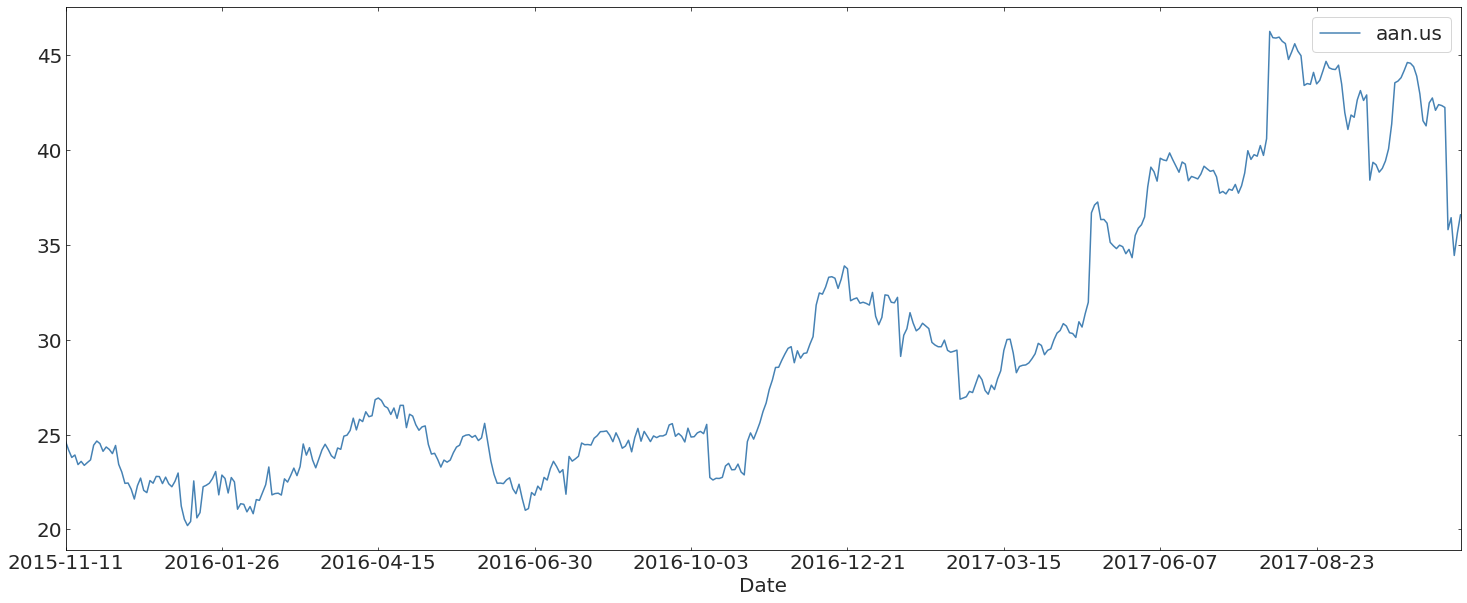

In [80]:
ax = tss[['aan.us']].plot(figsize=(25,10))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

In [73]:
aics_st4 = np.zeros((5,5))

from statsmodels.tsa.arima_model import ARIMA
model4 = ARIMA(tss[['aan.us']], order=(5,1,0))
model_fit4 = model4.fit(disp=0)
print(model_fit4.summary())

d = 10
for p in range(5):
    for q in range(5):
        try :
            #model3_v2 = ARIMA(tss[['aan.us']], order=(p,d,q))
            model3_v3 = ARIMA(tss[['aan.us']], order=(5,1,0))

            model_fit3_v3 = model3_v3.fit(disp=0)
            #mod = sm.tsa.ARMA(tss[['aaap.us']], (p, d, q)).fit()
            #print(model_fit.aic)
            aics_st4[p,q] = model_fit3_v3.aic
        except :
            pass
print("best parameters: ", np.where(aics_st4 == np.nanmin(aics_st4)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.aan.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -529.672
Method:                       css-mle   S.D. of innovations              0.793
Date:                Thu, 27 Feb 2020   AIC                           1073.344
Time:                        04:43:38   BIC                           1102.046
Sample:                             1   HQIC                          1084.660
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0276      0.036      0.773      0.440      -0.042       0.098
ar.L1.D.aan.us    -0.0283      0.047     -0.597      0.551      -0.121       0.065
ar.L2.D.aan.us     0.0326      0.047

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

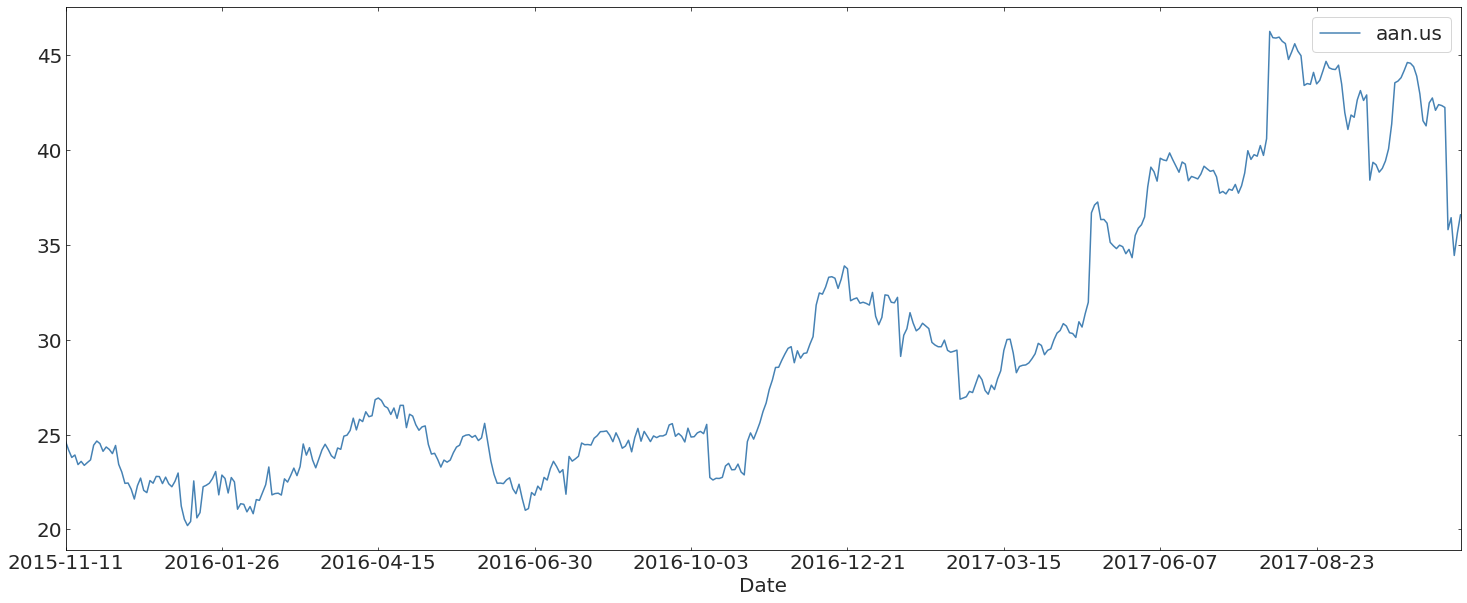

In [72]:
ax = tss[['aan.us']].plot(figsize=(25,10))
mod.plot_predict(end=500, plot_insample=False, ax=ax);